In [1]:
import pandas as pd
import csv
import seaborn as sb

In [2]:
#Extract infor from the UFO csv file
#dParser = lambda x: pd.datetime.strptime(x, "%m-%d-%Y %H-%p")
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv", index_col = "City") #, parse_dates = ["Time"], date_parser = dParser)
pd.set_option("display.max_rows", 150)
df

,Colors Reported,Shape Reported,State,Time
City,,,,
Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
Holyoke,NaN,OVAL,CO,2/15/1931 14:00
Abilene,NaN,DISK,KS,6/1/1931 13:00
New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...
Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
Eagle River,NaN,NaN,WI,12/31/2000 23:45


In [3]:
df["Time"] = pd.to_datetime(df["Time"])
df["Time"].dt.day_name()

City
Ithaca                   Sunday
Willingboro              Monday
Holyoke                  Sunday
Abilene                  Monday
New York Worlds Fair    Tuesday
                         ...   
Grant Park               Sunday
Spirit Lake              Sunday
Eagle River              Sunday
Eagle River              Sunday
Ybor                     Sunday
Name: Time, Length: 18241, dtype: object

In [4]:
df["Time"].max()
df["Time"].min(0)
diff = (df["Time"].max()) - (df["Time"].min())
diff

Timedelta('25781 days 01:59:00')

In [5]:
df["WeekDay"] = df["Time"].dt.day_name()
df

,Colors Reported,Shape Reported,State,Time,WeekDay
City,,,,,
Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday
Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday
Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday
Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday
New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday
...,...,...,...,...,...
Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,Sunday
Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,Sunday
Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,Sunday


In [6]:
filt = (df["Time"] >= pd.to_datetime("1930-06-01")) & (df["Time"] <= pd.to_datetime("2000-12-31"))#.dropna(axis = "index", how = "any")
df.loc[filt]

,Colors Reported,Shape Reported,State,Time,WeekDay
City,,,,,
Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday
Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday
Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday
Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday
New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday
...,...,...,...,...,...
Greenville,NaN,NaN,SC,2000-12-29 22:00:00,Friday
Eufaula,NaN,DISK,OK,2000-12-29 23:30:00,Friday
Simi Valley,NaN,FORMATION,CA,2000-12-30 10:00:00,Saturday


In [7]:
%matplotlib inline

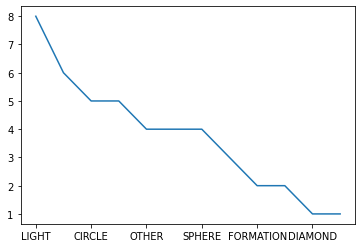

In [18]:
countryFilt = df.groupby("City")
greenville = countryFilt.get_group("San Francisco")
greenville["Shape Reported"].value_counts().plot()
#df.loc[greenville, ["Time"]].head(10).plot()
#countryFilt.count().head(50).plot()

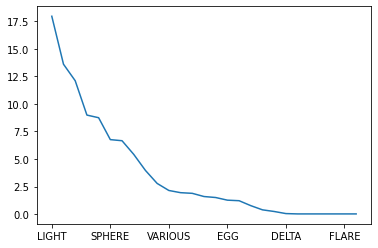

In [25]:
round((df["Shape Reported"].value_counts(normalize = True) * 100), 2).plot()